# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sb
from dateutil.parser import parse

# Automated Exploratory Data Analysis **Class**

In [2]:
class EDA:
    '''
    this class
       handles with missing values in the dataset (replace it)
       perform some visualization plots on data  
       
    load dataset from path, then handle missing values ... before anything
    '''
    
    # split dataframe into categorical & continues to make visualization easy
    # add features after handling missing values
    __categorical, __continues, __date_columns = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    def __init__(self, path_dataset, num_unique_values, perc_miss, target_index = None):
        '''
        path_dataset : Path (location) of dataset to which the operations will be applied
        num_unique_values : Number of unique values in a feature has 'int datatype',
                            to deal with it as categorical feature.
                    
        perc_miss : Percentage of missing values in a feature
                    in case the percentage of missing values more than 'perc_miss'
                    the feature is removed from dataset
                    
        target_index : the index of target feature | None, in case no target
        ''' 
        
        try :
            self.path_dataset = path_dataset
            self.nuv = num_unique_values
            self.pm = perc_miss
            self.tar_index = target_index
            ######################
        
            self.dataFrame = pd.read_csv(self.path_dataset)
            self.numRec = len(self.dataFrame)  
            ##
             # boolean not work during plot 
            if target_index != None:
                self.target = self.dataFrame.iloc[:,self.tar_index] 
                if self.target .dtype == bool:
                    self.target .replace([True, False], [1,0])
            ##
            self.__handle();
            pass
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass
    
    def about_dataset(self):
        '''
        '''
        print("\n Dataset has : ",self.numRec, " records (samples)")
        print("\n######################## information ########################\n")
        print(self.dataFrame.info())
        print("\n######################## description ########################\n")
        print(self.dataFrame.describe())
        pass
    
    ## Pre-processing
    
    def __handle(self):
        '''
        replace each null-value with:
                mean in continuous features
                mode in categorical features
        -------------------------------------
        and handle  boolean feature    
        '''
        
        for column in self.dataFrame.columns:
            if self.dataFrame[column].isnull().sum() / self.numRec >= self.pm:
                self.dataFrame = self.dataFrame.drop(columns=column, axis=1)
                pass
            elif self.dataFrame[column].dtype in \
                             (np.int8, np.int16, np.int32, np.int64,np.int_, np.int0):
                # Suppose a feature is a categorical feature when it has a maximum of 10 categories..
                # [ class '1' | class '2' | class '3' ]
                if len(self.dataFrame[column].unique()) <= self.nuv :
                    self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mode()[0]    
                    self.__categorical[column] = self.dataFrame[column]
                    pass
                
                else:
                    self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mean()
                    self.__continues[column] = self.dataFrame[column]
                    pass
                pass
            
            elif self.dataFrame[column].dtype == object:
                self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mode()[0]
                try:
                    parse(self.dataFrame[column][0])
                    date = pd.to_datetime(self.dataFrame[column])
                    date = [[da.year, da.month, da.day] for da in date]
                    date = pd.DataFrame(date, columns=[column +' year', column +' month',column +' day'])
                  
                    self.__date_columns = pd.concat([self.__date_columns, date], axis=1) 
                    pass
                except Exception:
                    self.__categorical[column] = self.dataFrame[column]; pass
                pass
            
            elif self.dataFrame[column].dtype in (np.float16, np.float32, np.float64):
                self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mean()
                self.__continues[column] = self.dataFrame[column]
                pass
            
            elif self.dataFrame[column].dtype == bool:
                self.__categorical[column] = self.target.replace([True, False], [1,0])
                self.__categorical[column][self.__categorical[column].isnull()] = \
                     self.__categorical[column].mode()[0]
                pass
            pass
        pass
    
    ### Continues features
    
    def hist_plot(self):
        '''
        plot histogram for each Continues feature in dataset
        '''
        try:
            for column in self.__continues.columns:
                sb.histplot(x=self.__continues[column], hue = self.target ,kde=True)
                py.show(); pass
            pass
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass
    
    def box_plot(self):
        '''
        plot histogram for each Continues feature in dataset
        '''
        try:
            for column in self.__continues.columns:
                sb.boxplot(x=self.__continues[column], hue = self.target)
                py.show(); pass
            pass 
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass
    
    def pairplot(self):
        '''
        plot pairplot for each Continues feature in dataset
        '''
        try:
            sb.pairplot(data=self.__continues)
            py.show(); pass 
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass
    
    def correlation(self):
        '''
        plot heatmap of correlation between Continues features in dataset
        '''
        try:
            sb.heatmap(data=self.__continues.corr(),annot=True)
            py.show(); pass 
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass
    
     ### Categorical features 
    
    def count_plot(self):
        '''
        plot countplot for each Continues feature in dataset
        ''' 
        try:
            for column in self.__categorical.columns:
                sb.countplot(self.__categorical[column], hue = self.target)
                py.show();   
                pass 
            
            # shape of date_columns (dataframe contains date-columns)
            # for one date-column (in orginal dataset), after split 
                # 'columnName year' 'columnName month' 'columnName day'
            
            l = np.shape(self.__date_columns)[1]
            for ind in range(0,l,3):
                years = np.unique(self.__date_columns.iloc[:,ind]); s = len(years)
                
                # Years
                sb.countplot(self.__date_columns.iloc[:,ind], hue = self.target)
                py.title("Plot Years"); py.show();    
                    
                # 12-Months for each year
                ig, axs = py.subplots(1, 1, figsize=(5*s,5))
                sb.countplot(self.__date_columns.iloc[:,ind], 
                                 hue=self.__date_columns.iloc[:,ind+1],ax=axs)
                py.title("12-Months for each year")
                py.legend(); py.show()
                    
                # Days in each month for each year
                for year in years:
                    fig, axs = py.subplots(1, 1, figsize=(5*s,5))
                    sb.countplot(self.__date_columns.iloc[:,ind+1] \
                                     [self.__date_columns.iloc[:,ind] == year], \
                                     hue=self.__date_columns.iloc[:,ind+2] \
                                     [self.__date_columns.iloc[:,ind] == year],ax=axs)
                        
                    py.title("Days in each month for year : " + str(year))
                    py.legend(); py.show()
                    pass 
            pass
        except Exception as e:
                    print(e,e.with_traceback); pass 
        pass
    
 
    def swarm_plot(self):
        '''
        plot swarmplot
        '''
        try:
            for colCon in self.__continues.columns:
                for colCat in self.__categorical.columns:
                    sb.swarmplot(x=self.__categorical[colCat], y=self.__continues[colCon]
                                  ,hue=self.target, split=True)
                    py.show(); pass
                
                l = np.shape(self.__date_columns)[1]
                for ind in range(0,l,3):     
                    sb.swarmplot(x=self.__date_columns.iloc[:, ind], y=self.__continues[colCon]
                                  ,hue=self.target, split=True)
                    py.show(); pass
                pass
            pass
        except Exception as e:
            print(e,e.with_traceback); pass 
        pass

# Test in ***Features data set.csv***

In [26]:
ed = EDA("Features data set.csv",10,0.5, -1)

C:\Users\ABOELK~1\AppData\Local\Temp/ipykernel_16808/2288867590.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mean()
C:\Users\ABOELK~1\AppData\Local\Temp/ipykernel_16808/2288867590.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataFrame[column][self.dataFrame[column].isnull()] = self.dataFrame[column].mode()[0]
C:\Users\ABOELK~1\AppData\Local\Temp/ipykernel_16808/2288867590.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [33]:
ed.about_dataset()


 Dataset has :  8190  records (samples)

######################## information ########################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB
None

######################## description ########################

             Store  Temperature   Fuel_Price          CPI  Unemployment
count  8190.000000  8190.000000  8190.000000  8190.000000   8190.000000
mean     23.000000    59.356198     3.405992   172.460809      7.826821
std      12.987966    18.678607     0.431337

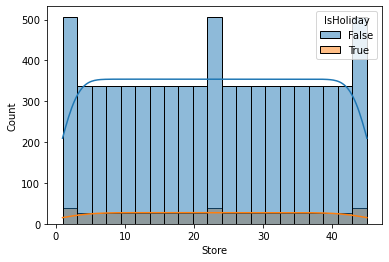

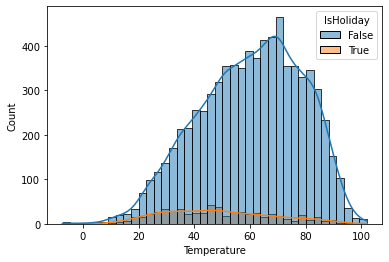

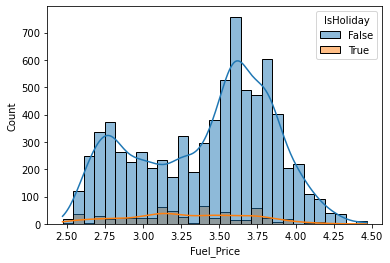

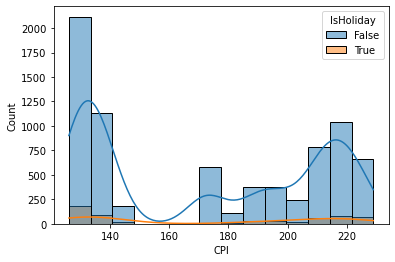

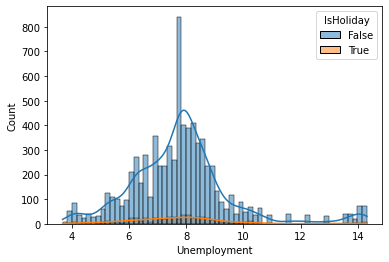

In [28]:
ed.hist_plot()

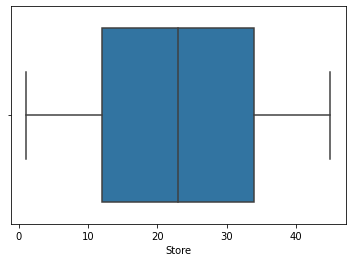

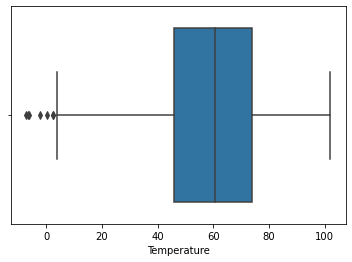

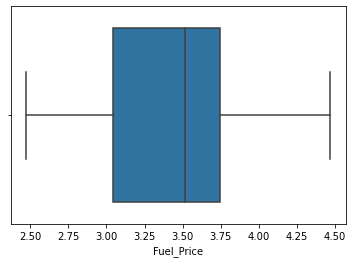

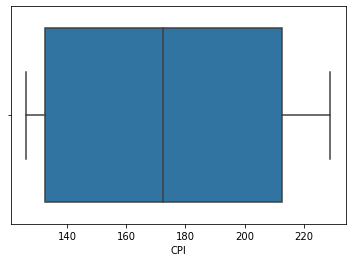

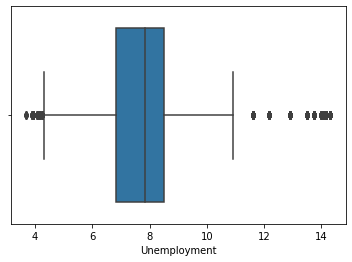

In [29]:
ed.box_plot()

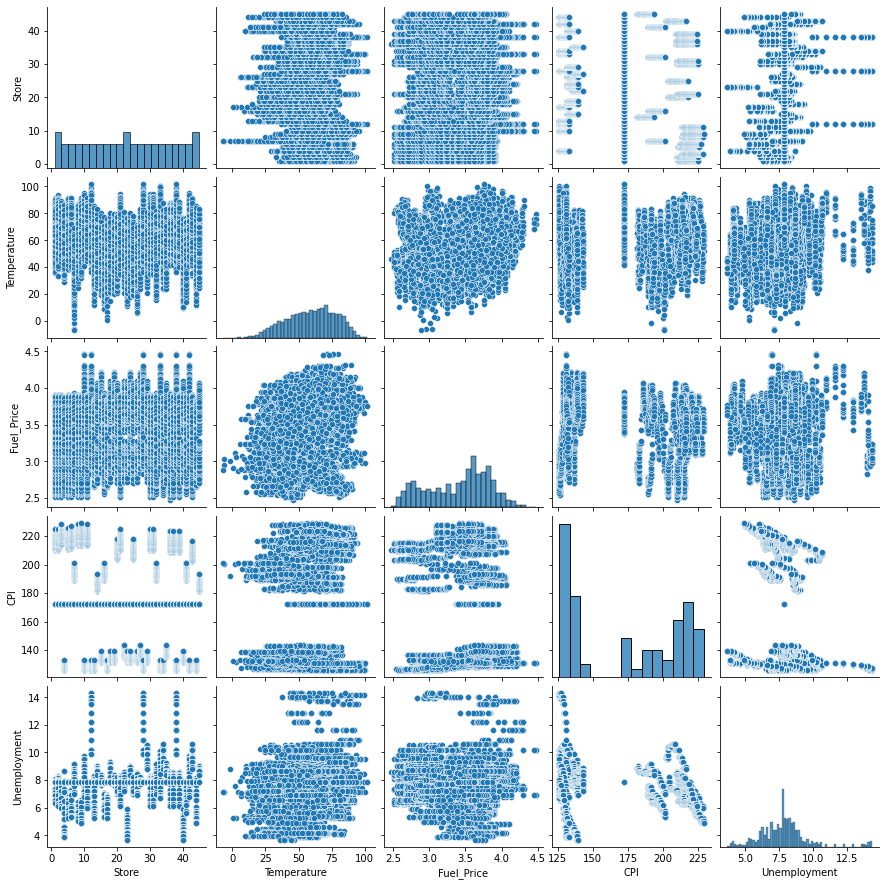

In [30]:
ed.pairplot()

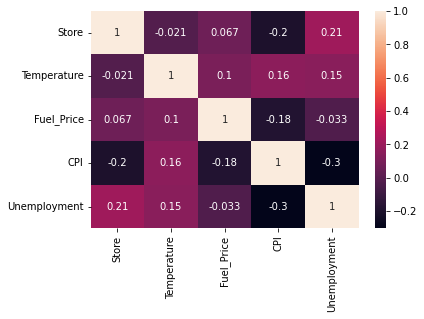

In [31]:
ed.correlation()

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


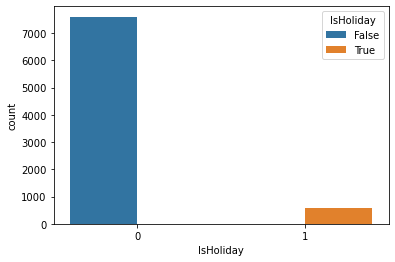

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


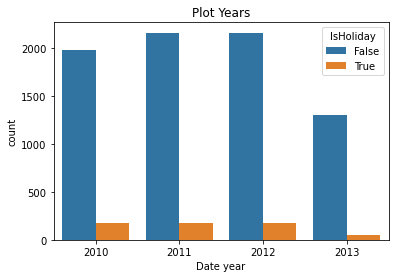

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


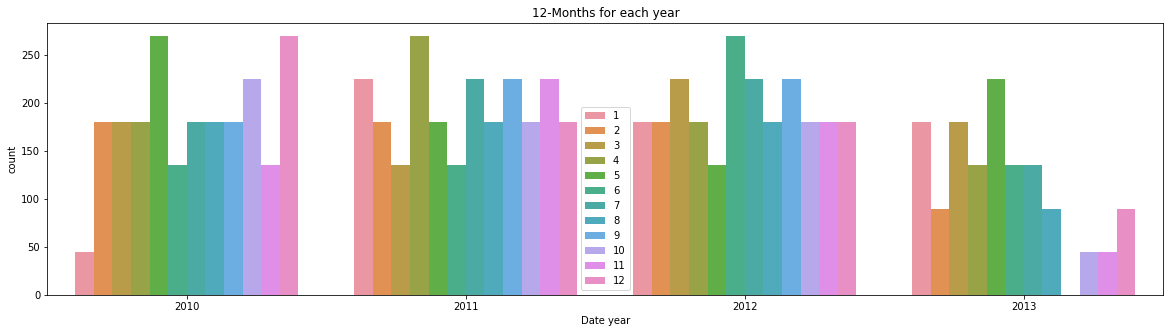

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


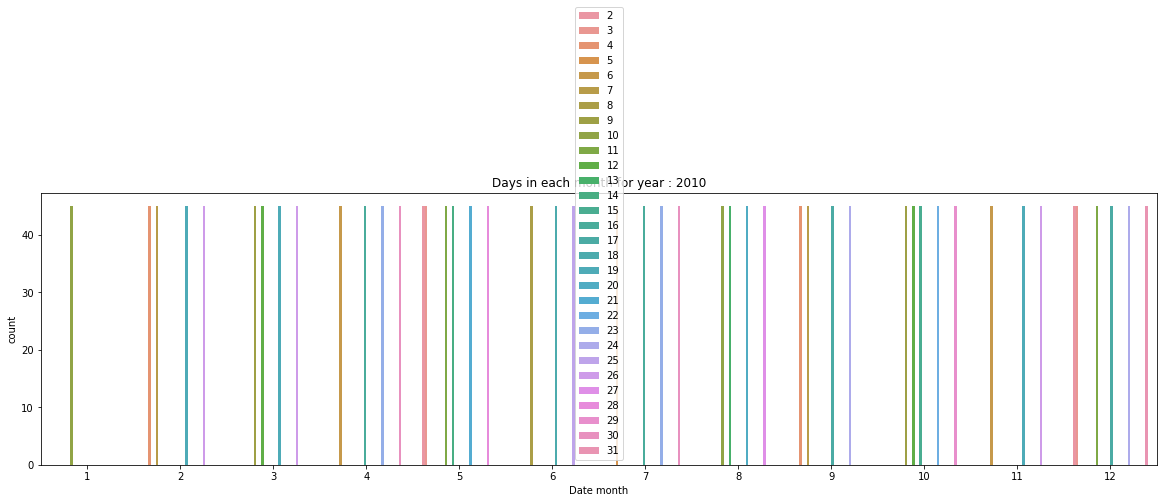

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


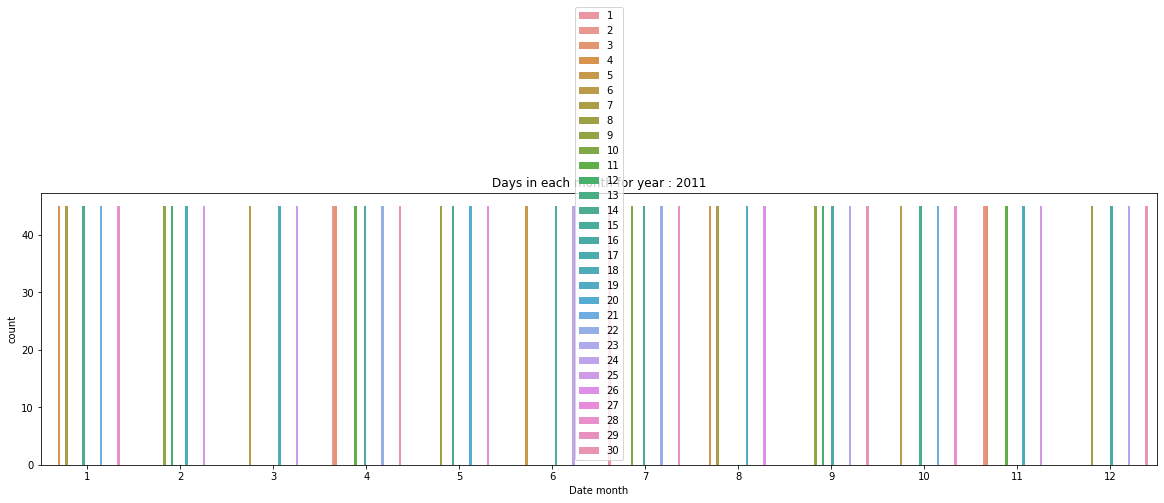

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


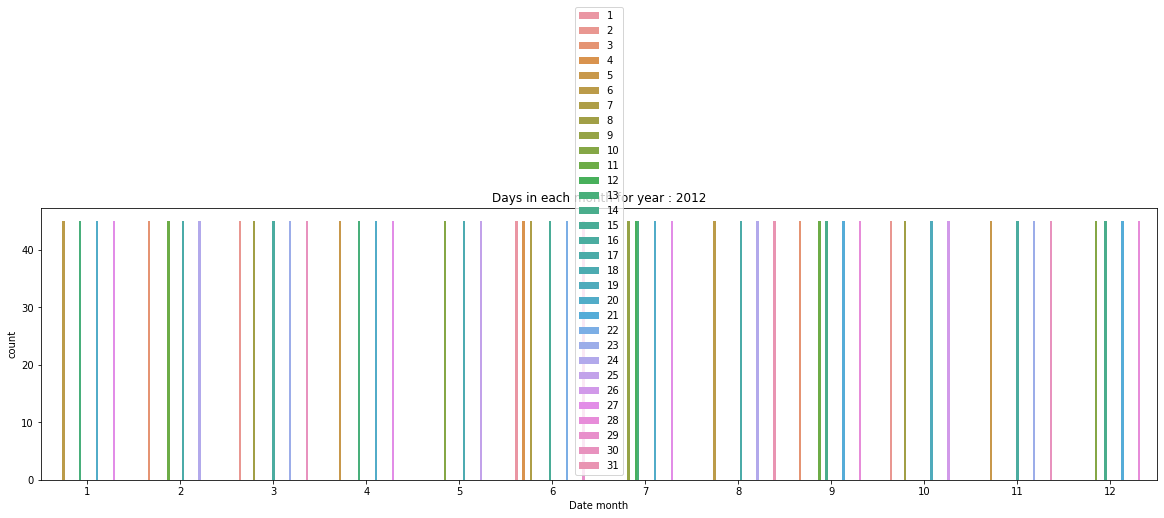

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


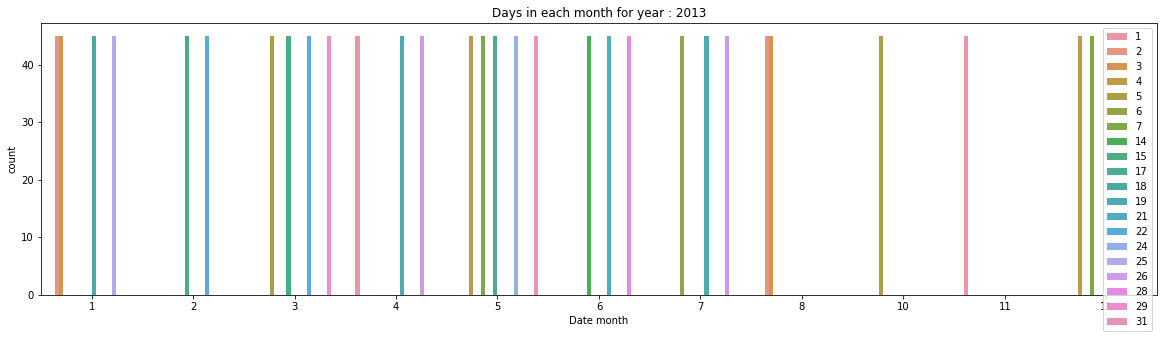

In [32]:
ed.count_plot()

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


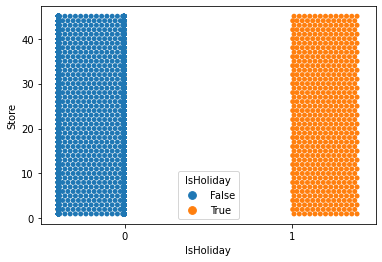

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


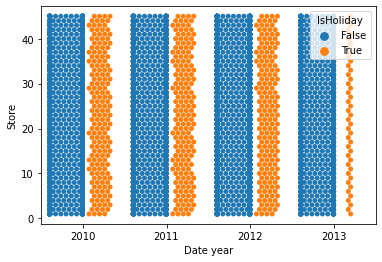

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


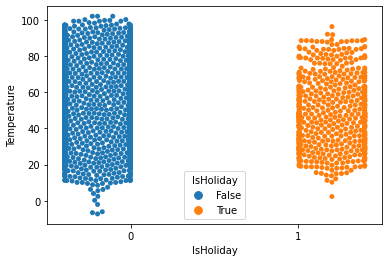

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you m

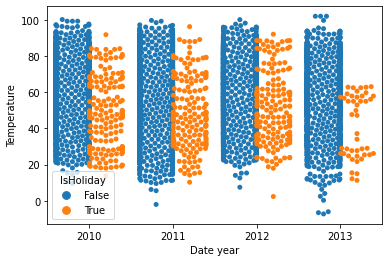

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


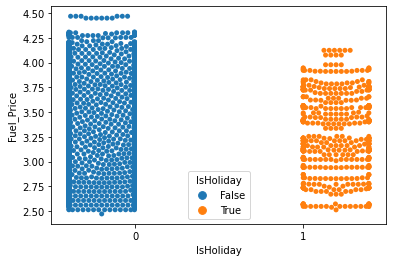

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you m

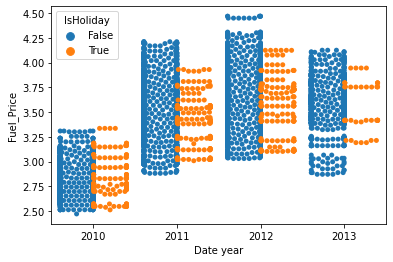

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


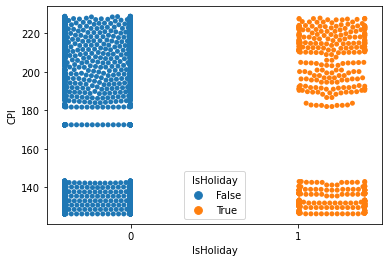

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you m

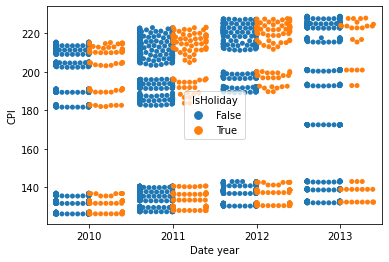

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


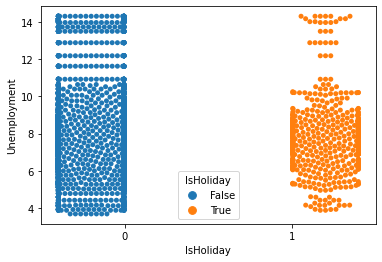

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you m

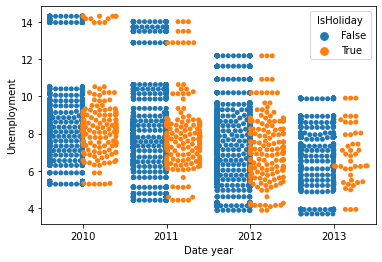

In [27]:
ed.correlationlot()

# Test in ***fatal-police-shootings-data.csv***

In [ ]:
edI = EDA("fatal-police-shootings-data.csv",10,0.5, -1)

In [51]:
edI.about_dataset()


 Dataset has :  5416  records (samples)

######################## information ########################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5416 non-null   object 
 5   age                      5416 non-null   float64
 6   gender                   5416 non-null   object 
 7   race                     5416 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     54

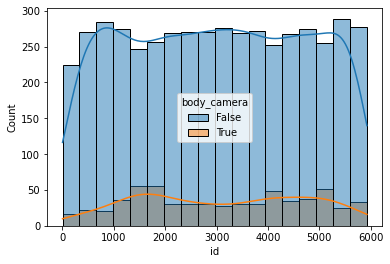

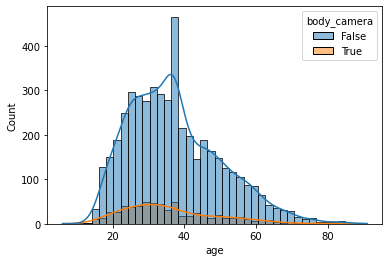

In [52]:
edI.hist_plot()

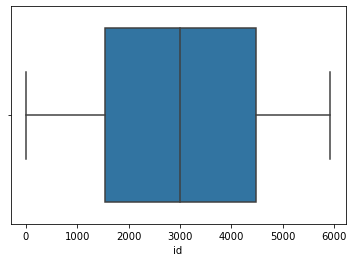

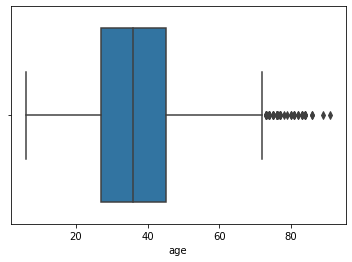

In [53]:
edI.box_plot()

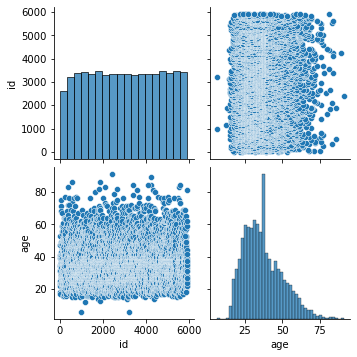

In [54]:
edI.pairplot()

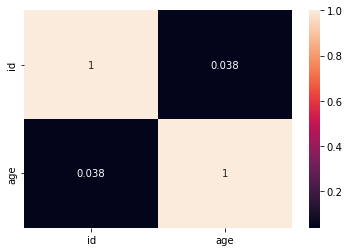

In [55]:
edI.correlation()

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


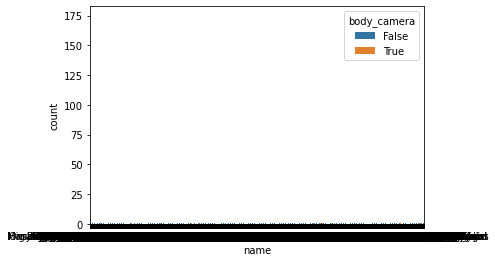

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


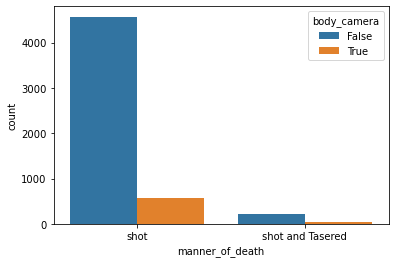

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


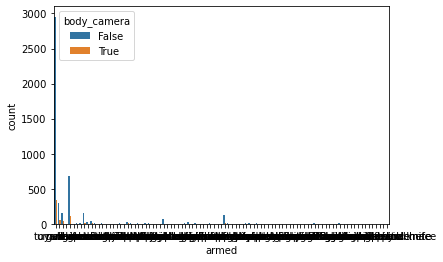

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


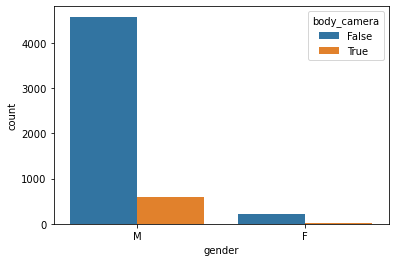

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


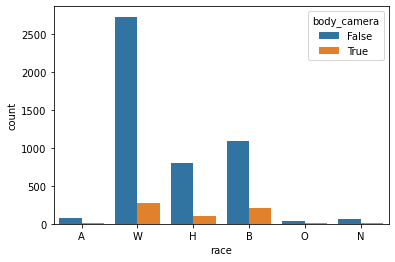

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


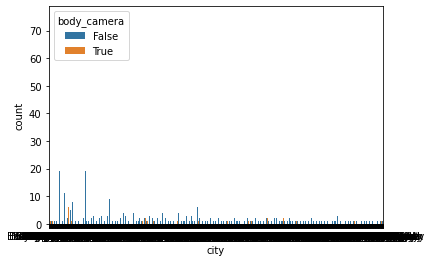

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


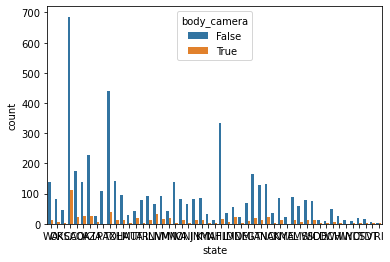

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


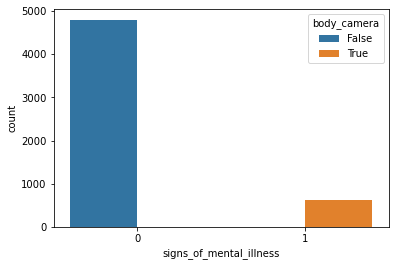

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


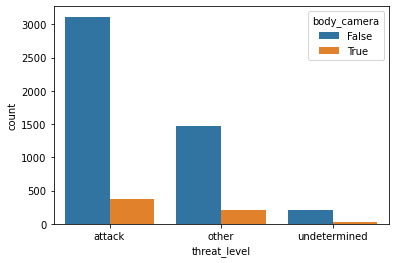

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


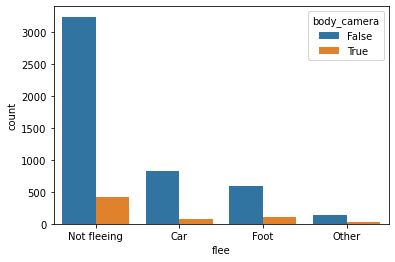

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


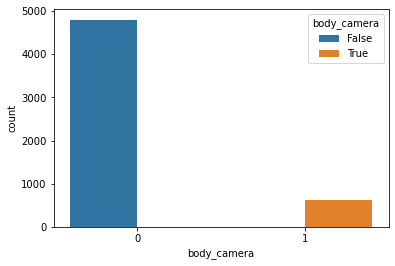

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


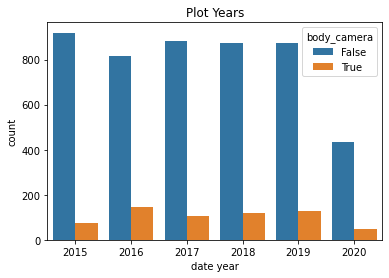

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


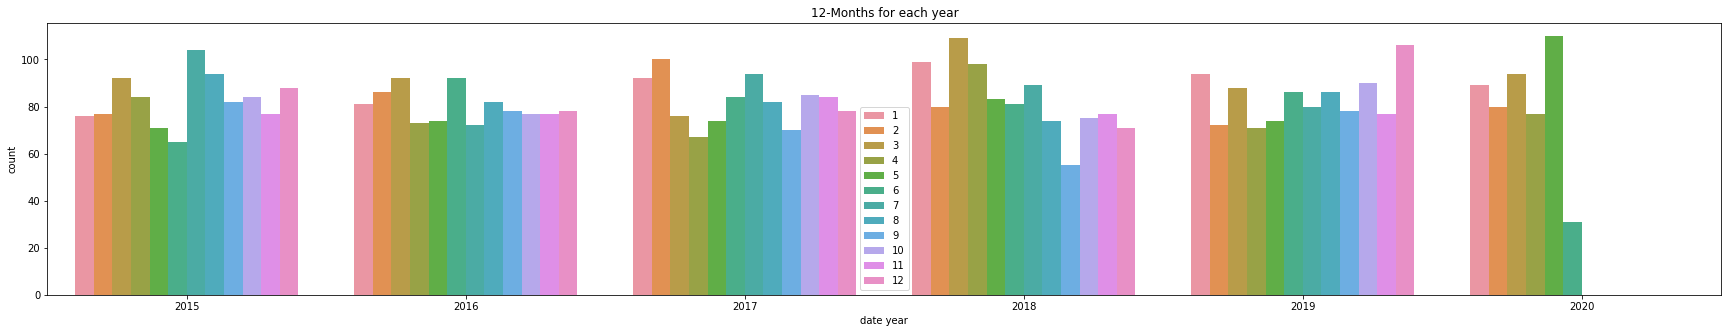

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


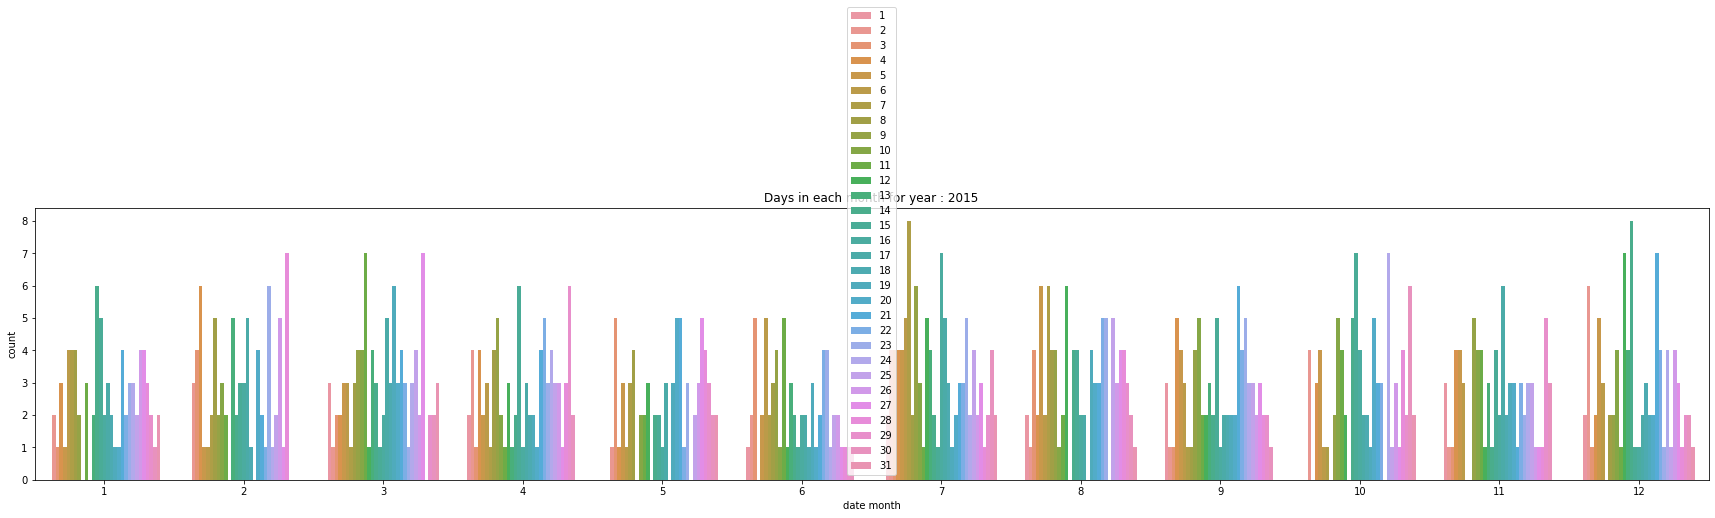

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


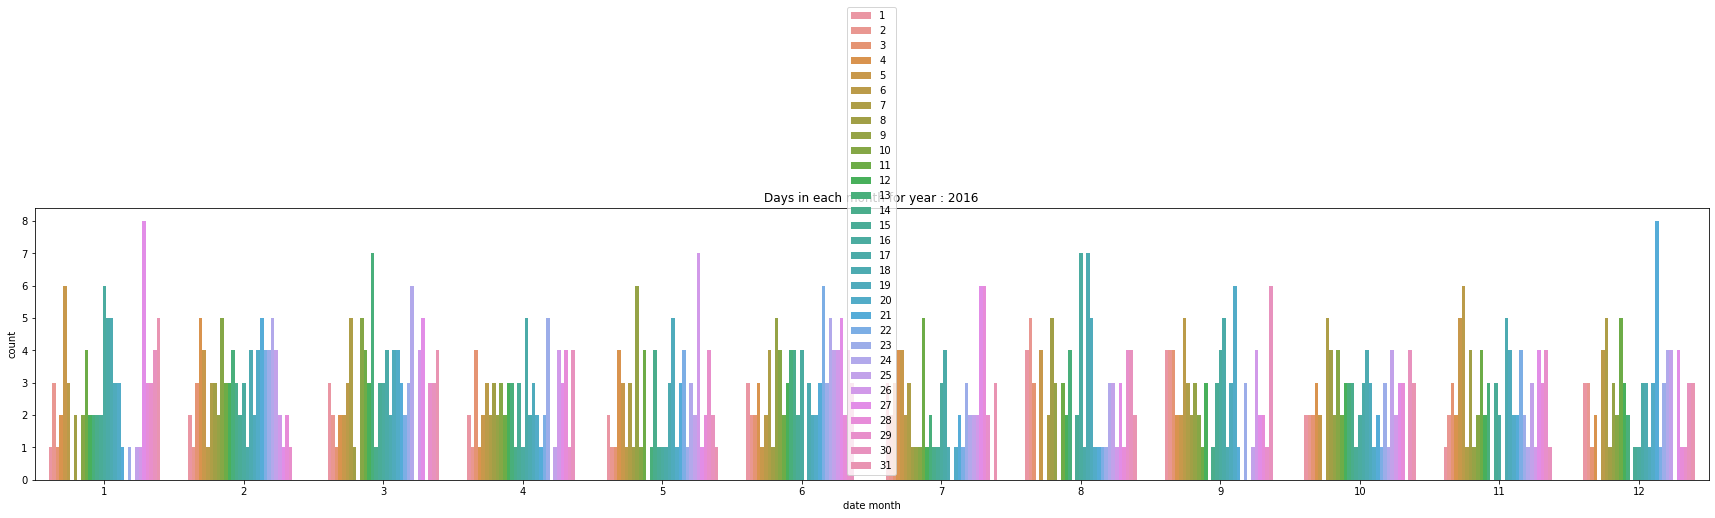

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


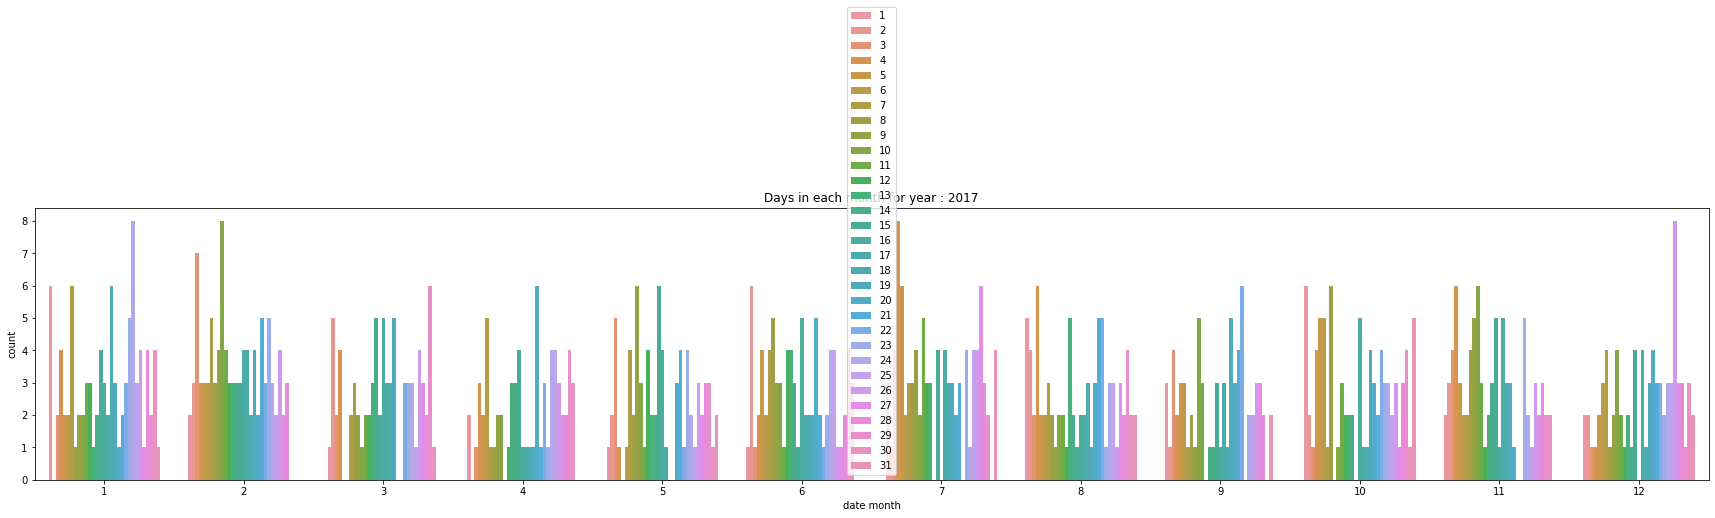

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


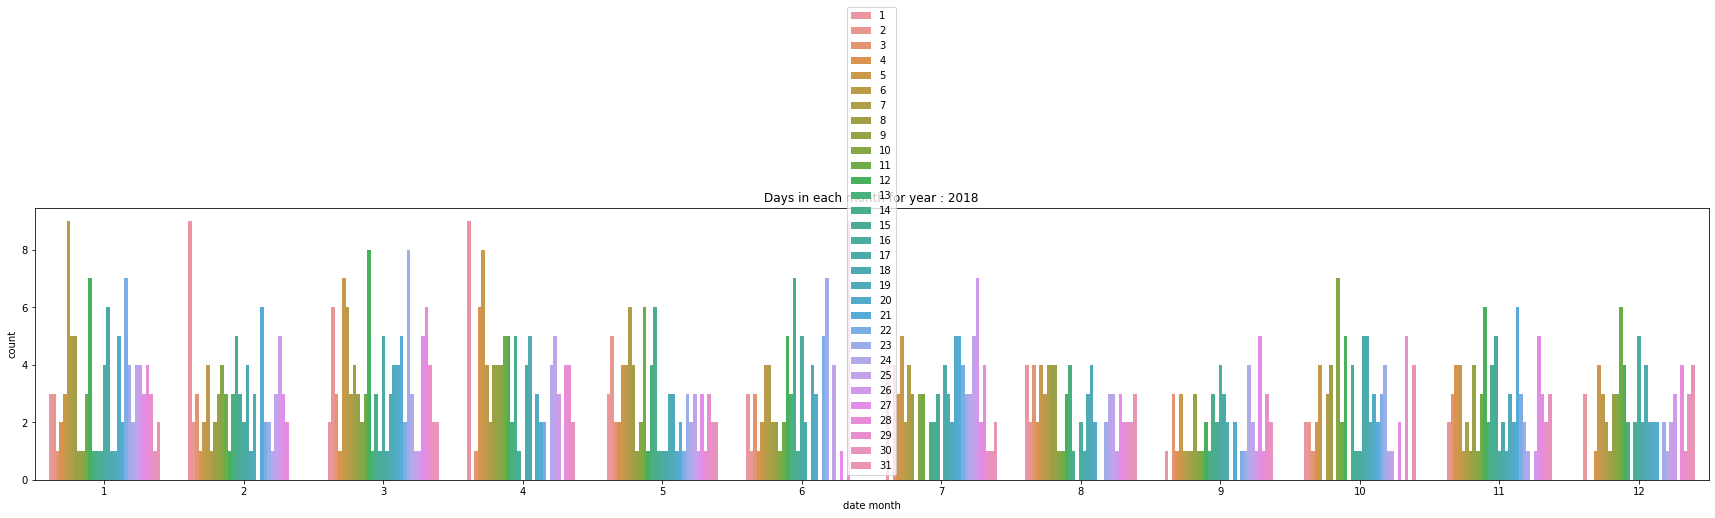

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


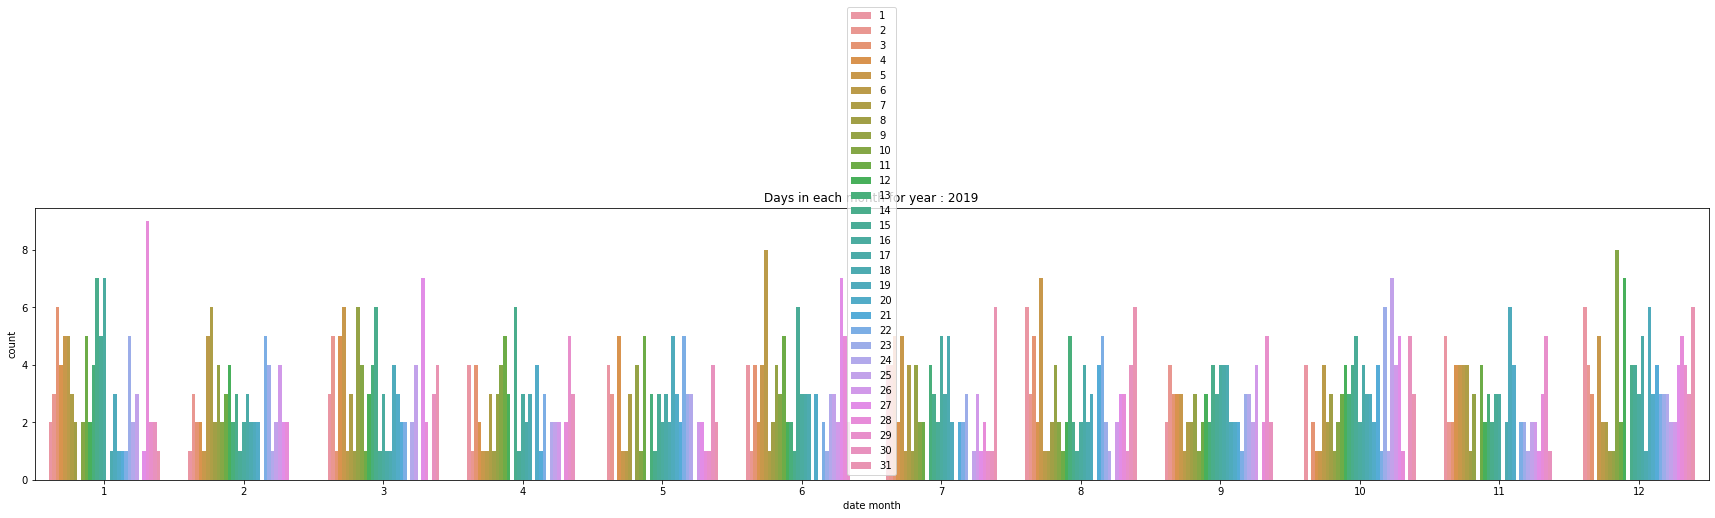

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


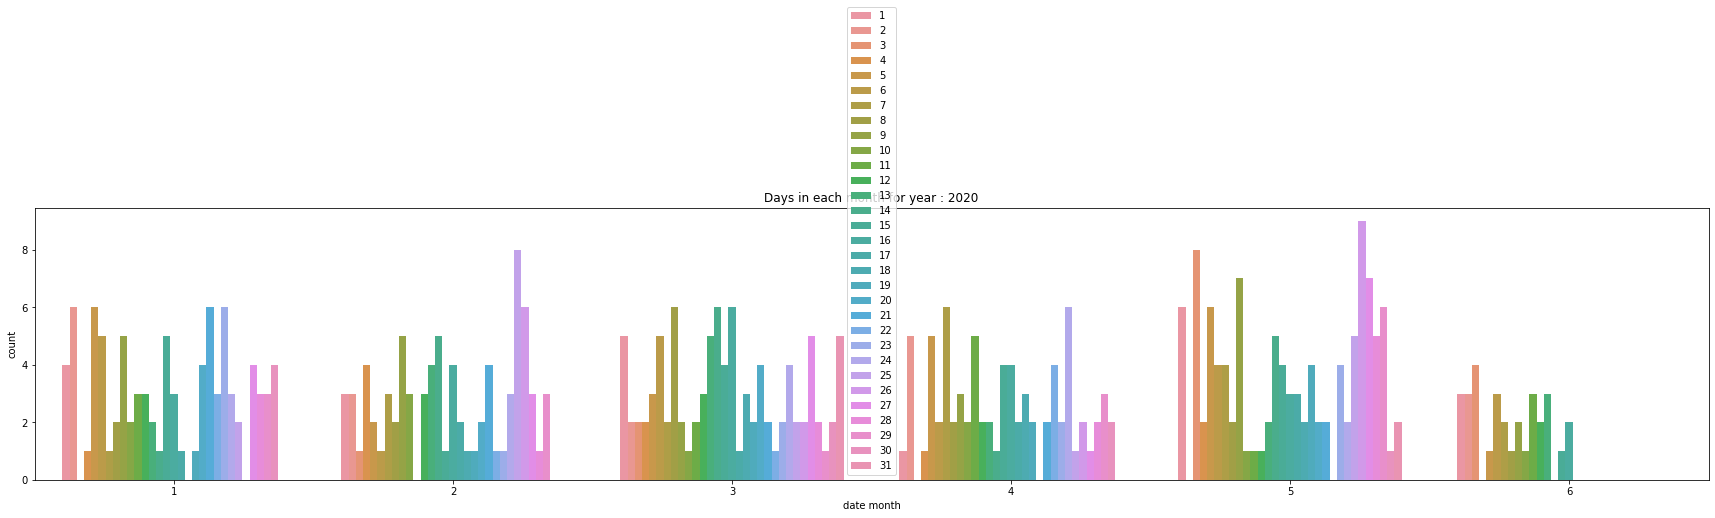

In [56]:
edI.count_plot()

In [ ]:
edI.swarm_plot()

C:\Users\ABO ELKHEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
